<a href="https://colab.research.google.com/github/andersonfs94/Identificador_Fake_News/blob/main/Machine_Learning_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar os datasets de notícias verdadeiras e falsas
# Load the datasets of true and fake news

# URL do dataset de notícias verdadeiras
# URL of the true news dataset
url_dados_true = 'https://drive.google.com/uc?id=1fhKaGollQvFgly7GdCB3-Hw2Jy7j5YI9'

# URL do dataset de notícias falsas
# URL of the fake news dataset
url_dados_fake = 'https://drive.google.com/uc?id=1ZYvxyyT1ppyiDjcz0s6jLVFC1Xj6Bzur'

# Carregar o dataset de notícias verdadeiras
# Load the true news dataset
dados_true = pd.read_csv(url_dados_true)

# Carregar o dataset de notícias falsas
# Load the fake news dataset
dados_fake = pd.read_csv(url_dados_fake)

In [3]:
# Descrever os dados para entender a distribuição
# Describe the data to understand the distribution
print(dados_true.describe())

                                                    title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182  


In [4]:
# Descrever os dados para entender a distribuição
# Describe the data to understand the distribution
print(dados_fake.describe())

                                                    title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46  


In [5]:
# Adicionar uma coluna de label aos datasets
# Add a label column to the datasets
dados_true['label'] = 'REAL'
dados_fake['label'] = 'FAKE'

# Concatenar os datasets em um único dataframe e embaralhar os dados
# Concatenate the datasets into a single dataframe and shuffle the data
dados = pd.concat([dados_true, dados_fake])

# Embaralha os dados e redefine o índice
# Shuffle the data and reset the index
dados = dados.sample(frac=1).reset_index().drop(columns=['index'])

In [6]:
# Verificar a forma do DataFrame
# Check the shape of the DataFrame
print(dados.shape)
# Exibe o número de linhas e colunas do DataFrame
# Displays the number of rows and columns in the DataFrame

(44898, 5)


In [7]:
# Visualizar as primeiras linhas do dataset unificado
# View the first few rows of the unified dataset
print(dados.head())

                                               title  \
0  TRUMP KICKS Pro-Amnesty, Globalist Koch Brothe...   
1  California Senator Dianne Feinstein to face De...   
2   Nazi-Ranting Man Accosts MSNBC Host At Iowa C...   
3  DON’T BELIEVE THE POLLS: Massive Silent Majori...   
4  SAY WHAT? Trump-Hater, RINO John McCain Admits...   

                                                text       subject  \
0  President-elect Donald Trump told a critical b...     left-news   
1  (Reuters) - Democrat Kevin de Leon, president ...  politicsNews   
2  A man ranting about Nazi Germany had a strange...          News   
3  So many acts of violence and vandalism have be...      politics   
4  Sworn Donald Trump enemy John McCain admitted ...     left-news   

                date label  
0        Jan 2, 2017  FAKE  
1  October 15, 2017   REAL  
2   February 2, 2016  FAKE  
3       Oct 23, 2016  FAKE  
4       Jan 11, 2017  FAKE  


In [8]:
# Separar as labels (rótulos)
# Separate the labels (targets)
rotulo = dados.label

# Exibe as primeiras linhas dos rótulos para uma visão geral
# Displays the first few rows of the labels for an overview
print(rotulo.head())

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object


In [9]:
# Dividindo os dados em treino e teste. Sendo a variável x o texto dos dados e a variável y o rótulo com as informações de verdadeiro/falso.
# As we are dealing with supervised learning, it's necessary to have the labels in the data.
# Splitting the data into training and testing sets. The variable x contains the text data, and the variable y contains the labels with true/false information.

x_train, x_test, y_train, y_test = train_test_split(dados['text'], rotulo, test_size=0.3, random_state=7)
# Divide the data into training and testing sets, with 30% of the data used for testing and a random seed for reproducibility


# Passive Aggressive Classifier

In [10]:
# Converter os textos em uma matriz TF-IDF
# Convert the texts into a TF-IDF matrix

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
# Cria um vetor TF-IDF, ignorando palavras comuns em inglês (stop words) e ignorando termos que aparecem em mais de 70% dos documentos
# Create a TF-IDF vectorizer, ignoring common English stop words and terms that appear in more than 70% of the documents

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
# Aplica o vetor TF-IDF nos dados de treino, ajustando o vocabulário e transformando os textos em uma matriz TF-IDF
# Apply the TF-IDF vectorizer to the training data, fitting the vocabulary and transforming the texts into a TF-IDF matrix

tfidf_test = tfidf_vectorizer.transform(x_test)
# Aplica o vetor TF-IDF nos dados de teste usando o vocabulário ajustado durante o treino
# Apply the TF-IDF vectorizer to the test data using the vocabulary learned from the training data


In [11]:
# Treinar o modelo de classificação Passive Aggressive
# Train the Passive Aggressive classifier model

pac = PassiveAggressiveClassifier(max_iter=50)
# Cria um classificador Passive Aggressive com um número máximo de 50 iterações
# Create a Passive Aggressive classifier with a maximum of 50 iterations

pac.fit(tfidf_train, y_train)
# Treina o modelo usando os dados de treino TF-IDF e os rótulos correspondentes
# Train the model using the TF-IDF training data and the corresponding labels


PassiveAggressiveClassifier(max_iter=50)

In [12]:
# Fazer previsões no conjunto de teste
# Make predictions on the test set
y_pred = pac.predict(tfidf_test)

score = accuracy_score(y_test, y_pred)
# Calcula a acurácia comparando as previsões do modelo com os rótulos reais do conjunto de teste
# Compute the accuracy by comparing the model's predictions with the true labels of the test set

print(f'Precisão do Passive Aggressive Classifier: {round(score*100,2)}%')
# Exibe a precisão do classificador Passive Aggressive em porcentagem
# Display the accuracy of the Passive Aggressive Classifier as a percentage

Precisão do Passive Aggressive Classifier: 99.24%


In [13]:
cf_matrix = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
# Cria a matriz de confusão comparando as previsões do modelo com os rótulos reais do conjunto de teste
# Create the confusion matrix by comparing the model's predictions with the true labels of the test set

print(cf_matrix)
# Exibe a matriz de confusão
# Display the confusion matrix

[[6888   45]
 [  57 6480]]


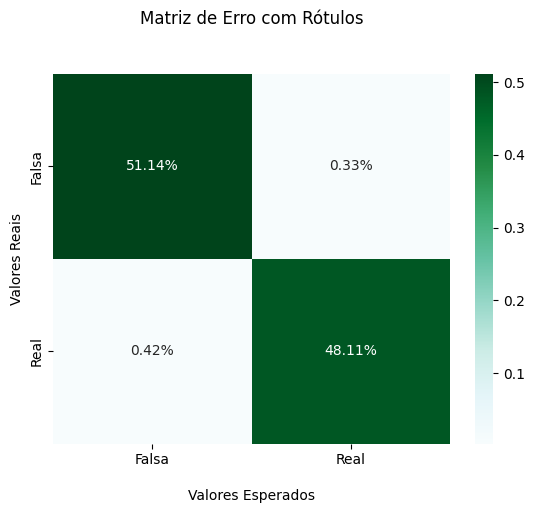

In [14]:
# Visualizar a matriz de confusão usando Seaborn
# Visualize the confusion matrix using Seaborn

ax = sns.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='BuGn')
# Cria um gráfico de calor da matriz de confusão normalizada usando a biblioteca Seaborn
# Creates a heatmap of the normalized confusion matrix using the Seaborn library

ax.set_title('Matriz de Erro com Rótulos\n\n')
# Define o título do gráfico
# Set the title of the plot

ax.set_xlabel('\nValores Esperados')
# Define o rótulo do eixo x
# Set the label for the x-axis

ax.set_ylabel('Valores Reais')
# Define o rótulo do eixo y
# Set the label for the y-axis

ax.xaxis.set_ticklabels(['Falsa', 'Real'])
# Define os rótulos dos ticks no eixo x
# Set the tick labels for the x-axis

ax.yaxis.set_ticklabels(['Falsa', 'Real'])
# Define os rótulos dos ticks no eixo y
# Set the tick labels for the y-axis

plt.show()
# Exibe o gráfico
# Display the plot
